In [1]:
import matplotlib.pyplot as plt
import numpy as np
from load_data import (
    MOVIE_LEN, FRAME_SHAPE, 
    load_movie, load_ground_truth_generation_data
)
from unet_basic.model_3d import unet3d, unet3d_simply, plot_model
import tensorflow as tf
import data_gen
from importlib import reload

DATA_PACKED_FOR_GT_GENERATION_PATH = "../dataPackedForGeneration.mat"
MOVIE_PATH = "../preprocessed/preprocessedMovie.h5"

movie = load_movie(MOVIE_PATH)
data_packed = \
    load_ground_truth_generation_data(DATA_PACKED_FOR_GT_GENERATION_PATH)

In [6]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(display_list[i])
    plt.axis('off')
  plt.show()

def show_prediction(dataset, index):

    i = index
    x = dataset[0][i:i+1]
    y = dataset[1][i:i+1]

    frame = x[0, len(x)//2-1]
    predictions = model.predict(x)
    dim = frame.shape[:2]
    p = np.max(predictions, 3).reshape(dim)

    display([frame.reshape(dim), p, y.reshape(dim)])

In [7]:
dg = data_gen.DataGenerator(movie, data_packed)

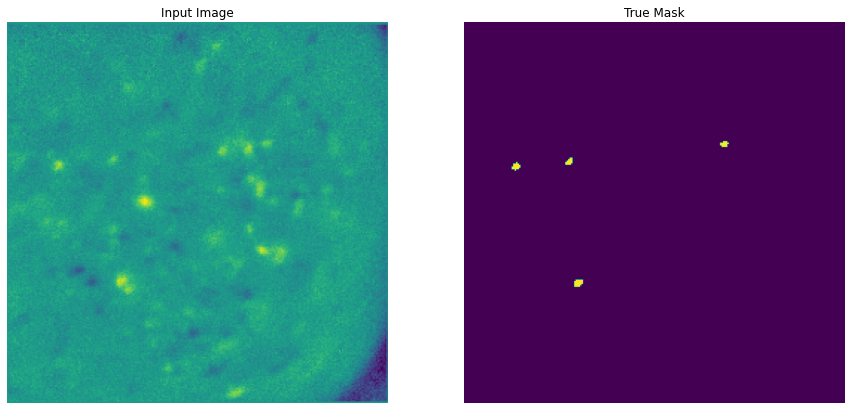

In [28]:
i = 345
x = dg.get_x(i)
dim  = x.shape[1:3]
y = dg.get_y(i).reshape(dim)
display([x[3].reshape(dim), y])

In [36]:
ds = data_gen.DataSequencer(list(range(10,100)), movie, data_packed, shuffle=False)

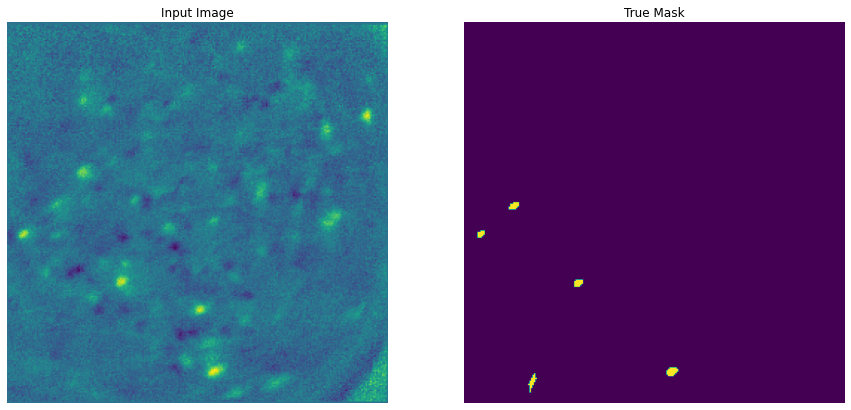

In [54]:
i = 0
x, y = ds[i]
j = 2
x = x[j]
y = y[j]
dim = x.shape[1:3]
display([x[3].reshape(dim), y.reshape(dim)])

In [47]:
dim

(256, 256)